In [1]:
#import the required libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df = pd.read_excel(r'C:\Users\Admin\Desktop\customer_churn\Customer_Churn_Prediction\E Commerce Dataset.xlsx', sheet_name='E Comm')
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


# Exploratory Data Analysis

In [3]:
df.shape

(5630, 20)

In [4]:
df.columns.values

array(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice',
       'CityTier', 'WarehouseToHome', 'PreferredPaymentMode', 'Gender',
       'HourSpendOnApp', 'NumberOfDeviceRegistered', 'PreferedOrderCat',
       'SatisfactionScore', 'MaritalStatus', 'NumberOfAddress',
       'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed',
       'OrderCount', 'DaySinceLastOrder', 'CashbackAmount'], dtype=object)

In [5]:
df.dtypes

CustomerID                       int64
Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                 float64
dtype: object

In [6]:
#Removing unimportant columns
# Specify the columns you want to drop
columns_to_drop = ['NumberOfAddress', 'CustomerID']

# Use the drop method to remove the specified columns
df = df.drop(columns=columns_to_drop)


In [7]:
df.describe()

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


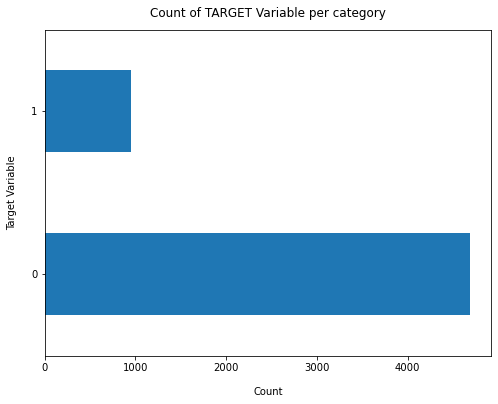

In [8]:
df['Churn'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02);

In [9]:
100*df['Churn'].value_counts()/len(df['Churn'])

0    83.161634
1    16.838366
Name: Churn, dtype: float64

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


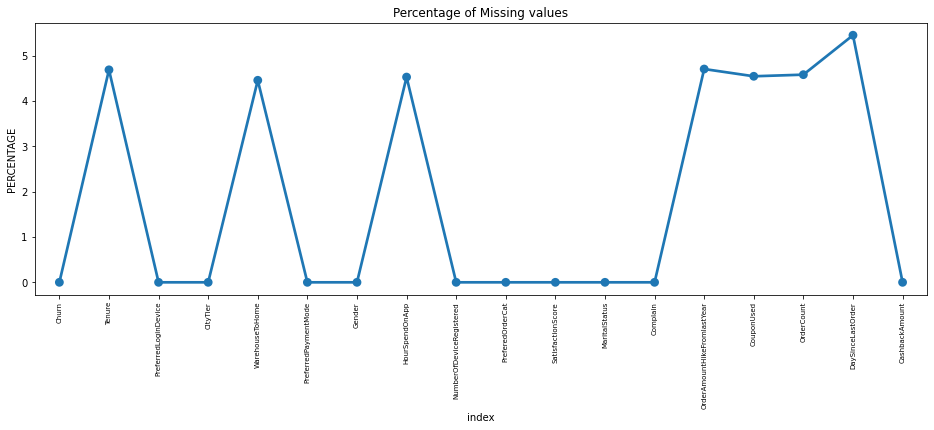

In [10]:
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

In [11]:
df.info(verbose = True) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        5630 non-null   int64  
 1   Tenure                       5366 non-null   float64
 2   PreferredLoginDevice         5630 non-null   object 
 3   CityTier                     5630 non-null   int64  
 4   WarehouseToHome              5379 non-null   float64
 5   PreferredPaymentMode         5630 non-null   object 
 6   Gender                       5630 non-null   object 
 7   HourSpendOnApp               5375 non-null   float64
 8   NumberOfDeviceRegistered     5630 non-null   int64  
 9   PreferedOrderCat             5630 non-null   object 
 10  SatisfactionScore            5630 non-null   int64  
 11  MaritalStatus                5630 non-null   object 
 12  Complain                     5630 non-null   int64  
 13  OrderAmountHikeFro

In [12]:
# Fill missing values for numerical columns with the median
df.fillna(df.median(), inplace=True)

# Fill missing values for categorical columns with the mode
df.fillna(df.mode().iloc[0], inplace=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_19624\1733768078.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.median(), inplace=True)


In [13]:
#Saving copy of original dataset
df_original = df
df = pd.get_dummies(df)
df.head()

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,Complain,OrderAmountHikeFromlastYear,CouponUsed,...,Gender_Male,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,1,4.0,3,6.0,3.0,3,2,1,11.0,1.0,...,0,0,0,1,0,0,0,0,0,1
1,1,9.0,1,8.0,3.0,4,3,1,15.0,0.0,...,1,0,0,0,1,0,0,0,0,1
2,1,9.0,1,30.0,2.0,4,3,1,14.0,0.0,...,1,0,0,0,1,0,0,0,0,1
3,1,0.0,3,15.0,2.0,4,5,0,23.0,0.0,...,1,0,0,1,0,0,0,0,0,1
4,1,0.0,1,12.0,3.0,3,5,0,11.0,1.0,...,1,0,0,0,1,0,0,0,0,1


In [14]:
df.isnull().sum()

Churn                                    0
Tenure                                   0
CityTier                                 0
WarehouseToHome                          0
HourSpendOnApp                           0
NumberOfDeviceRegistered                 0
SatisfactionScore                        0
Complain                                 0
OrderAmountHikeFromlastYear              0
CouponUsed                               0
OrderCount                               0
DaySinceLastOrder                        0
CashbackAmount                           0
PreferredLoginDevice_Computer            0
PreferredLoginDevice_Mobile Phone        0
PreferredLoginDevice_Phone               0
PreferredPaymentMode_CC                  0
PreferredPaymentMode_COD                 0
PreferredPaymentMode_Cash on Delivery    0
PreferredPaymentMode_Credit Card         0
PreferredPaymentMode_Debit Card          0
PreferredPaymentMode_E wallet            0
PreferredPaymentMode_UPI                 0
Gender_Fema

In [15]:
df.corr()

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,Complain,OrderAmountHikeFromlastYear,CouponUsed,...,Gender_Male,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
Churn,1.000000,-0.337831,0.084703,0.069544,0.018816,0.107939,0.105481,0.250188,-0.007075,-0.001430,...,0.029264,-0.014871,-0.089575,-0.133353,0.113364,0.154387,-0.054903,-0.024934,-0.151024,0.180847
Tenure,-0.337831,1.000000,-0.057895,-0.012191,-0.017282,-0.020657,-0.014452,-0.020535,-0.005542,0.101535,...,-0.046389,0.101770,0.348600,-0.053529,-0.169377,-0.233106,0.265067,0.039472,0.082896,-0.119053
CityTier,0.084703,-0.057895,1.000000,0.013576,-0.009921,0.027934,-0.011554,0.003375,-0.028890,0.022629,...,-0.025176,0.063189,0.004160,0.226587,-0.127602,-0.188046,-0.042998,0.014545,-0.029922,0.020878
WarehouseToHome,0.069544,-0.012191,0.013576,1.000000,0.064069,0.023020,0.007524,0.026825,0.038311,0.002675,...,-0.001261,0.031571,0.033470,0.044414,-0.051364,-0.017583,-0.075069,-0.006881,0.028811,-0.025570
HourSpendOnApp,0.018816,-0.017282,-0.009921,0.064069,1.000000,0.305048,0.030937,0.006607,0.099305,0.187166,...,-0.017897,-0.007834,-0.044766,-0.038199,-0.175221,0.237925,-0.024705,0.012972,0.034394,-0.046784
NumberOfDeviceRegistered,0.107939,-0.020657,0.027934,0.023020,0.305048,1.000000,-0.017228,0.003407,0.065714,0.152065,...,-0.021799,0.036230,-0.035706,-0.006282,-0.215316,0.168584,0.021423,-0.005947,-0.036259,0.043389
SatisfactionScore,0.105481,-0.014452,-0.011554,0.007524,0.030937,-0.017228,1.000000,-0.031115,-0.027121,0.017423,...,-0.035220,0.011944,0.002287,-0.019501,0.005493,0.005577,0.001442,0.058064,-0.023576,-0.019314
Complain,0.250188,-0.020535,0.003375,0.026825,0.006607,0.003407,-0.031115,1.000000,-0.003842,-0.007810,...,-0.040269,0.007419,0.013917,-0.021304,0.006186,0.011191,-0.013429,0.007044,-0.003720,-0.001422
OrderAmountHikeFromlastYear,-0.007075,-0.005542,-0.028890,0.038311,0.099305,0.065714,-0.027121,-0.003842,1.000000,0.024482,...,-0.001702,0.011154,-0.014579,-0.004927,-0.043680,0.067747,-0.051031,-0.014253,0.004524,0.006094
CouponUsed,-0.001430,0.101535,0.022629,0.002675,0.187166,0.152065,0.017423,-0.007810,0.024482,1.000000,...,-0.034740,0.134283,0.071422,-0.026747,-0.183177,-0.010326,0.072709,0.031839,0.009851,-0.034981


<AxesSubplot:>

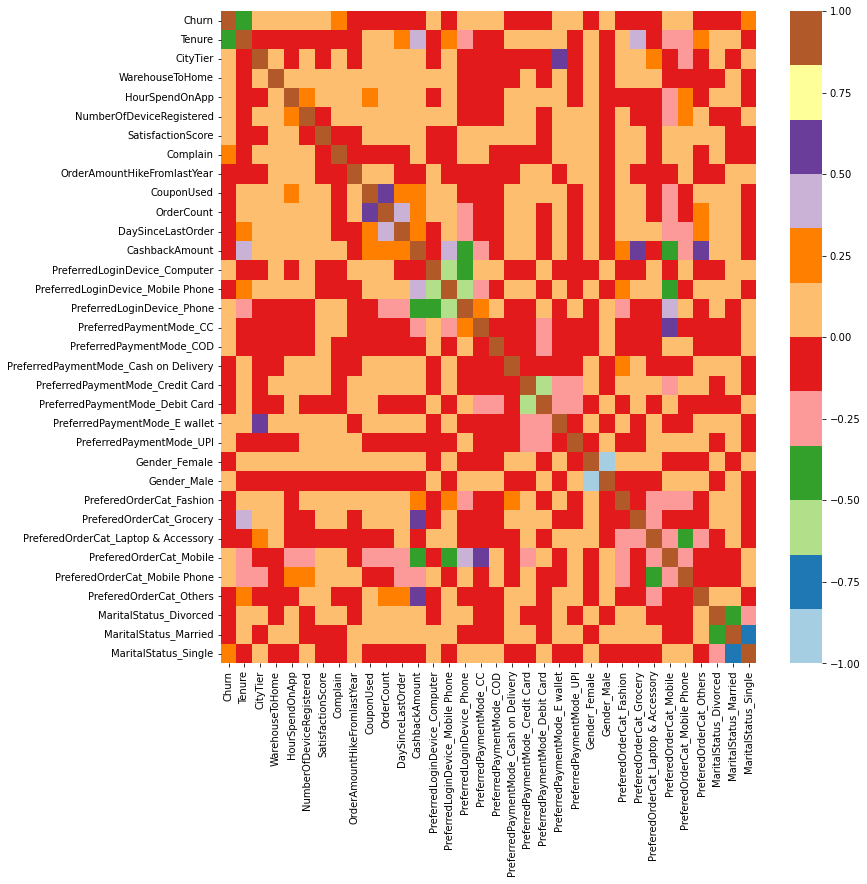

In [16]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), cmap="Paired")

In [17]:
churn_summary = df.groupby('Churn').mean()
print(churn_summary)


          Tenure  CityTier  WarehouseToHome  HourSpendOnApp  \
Churn                                                         
0      11.404528  1.619821        15.305639        2.928663   
1       3.859705  1.827004        16.856540        2.964135   

       NumberOfDeviceRegistered  SatisfactionScore  Complain  \
Churn                                                          
0                      3.639257           3.001282  0.234088   
1                      3.934599           3.390295  0.535865   

       OrderAmountHikeFromlastYear  CouponUsed  OrderCount  ...  Gender_Male  \
Churn                                                       ...                
0                        15.686032    1.718069    2.992952  ...     0.594618   
1                        15.618143    1.710970    2.808017  ...     0.632911   

       PreferedOrderCat_Fashion  PreferedOrderCat_Grocery  \
Churn                                                       
0                      0.149082                

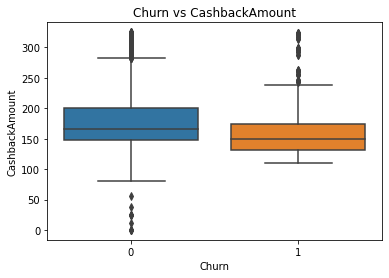

In [18]:
sns.boxplot(x='Churn', y='CashbackAmount', data=df)
plt.title('Churn vs CashbackAmount')
plt.show()


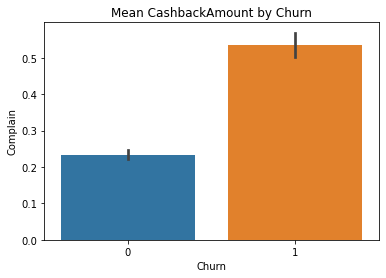

In [19]:
sns.barplot(x='Churn', y='Complain', data=df)
plt.title('Mean CashbackAmount by Churn')
plt.show()


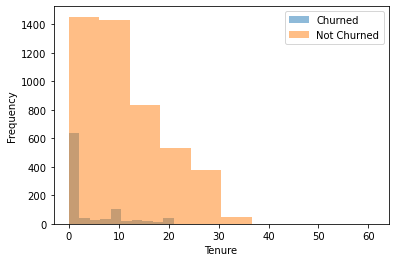

In [20]:
plt.hist(df['Tenure'][df['Churn'] == 1], alpha=0.5, label='Churned')
plt.hist(df['Tenure'][df['Churn'] == 0], alpha=0.5, label='Not Churned')
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.legend()
plt.show()


Text(0.5, 1.0, 'SatisfactionScore by churn')

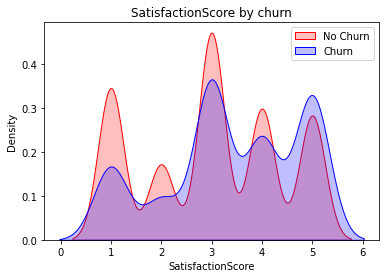

In [21]:
Mth = sns.kdeplot(df.SatisfactionScore[(df["Churn"] == 0) ],
                color="Red", shade = True)
Mth = sns.kdeplot(df.SatisfactionScore[(df["Churn"] == 1) ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('SatisfactionScore')
Mth.set_title('SatisfactionScore by churn')

 **Derived Insights**
Those Customers churned more who had complained.


Those Customers churned more who last ordered in previous 4 days



Those Customers churned more who gave high satisfaction rating

In [22]:
new_df1_target0= df_original[df_original["Churn"]==0]
new_df1_target1= df_original[df_original["Churn"]==1]

In [23]:
def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright') 
        
    plt.show()

In [24]:
df_original.columns

Index(['Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'Complain', 'OrderAmountHikeFromlastYear',
       'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

# Bivariate Analysis

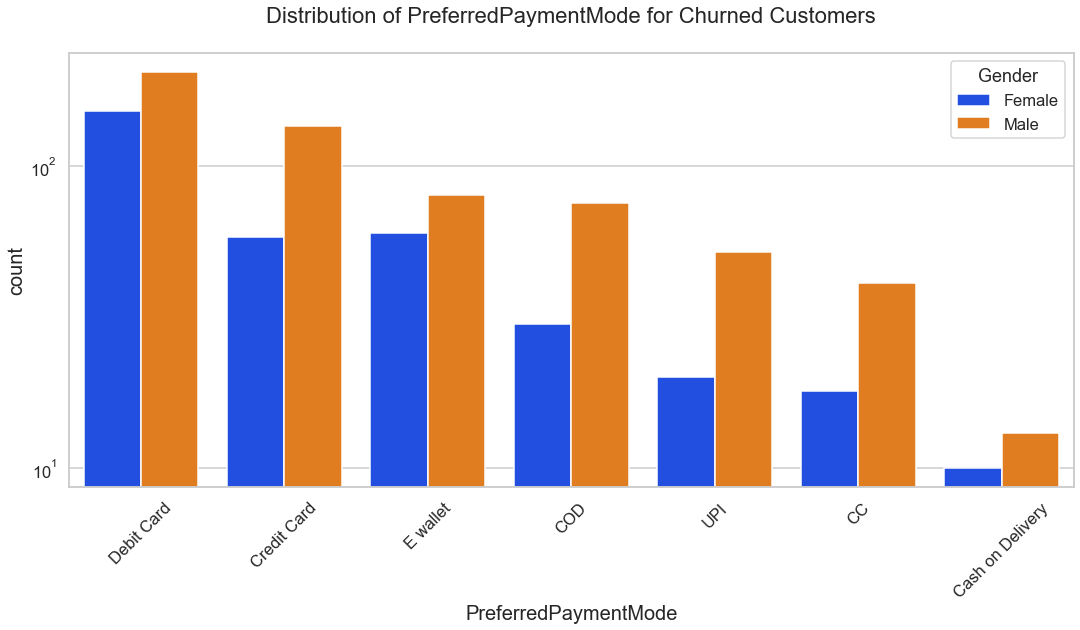

In [25]:
uniplot(new_df1_target1,col='PreferredPaymentMode',title='Distribution of PreferredPaymentMode for Churned Customers',hue='Gender')

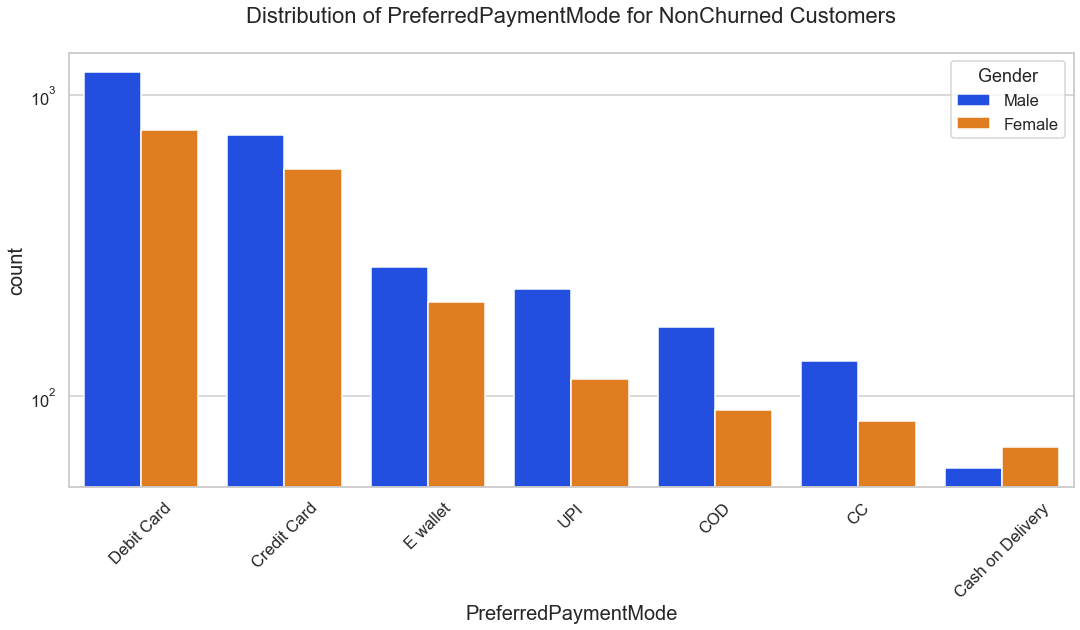

In [26]:
uniplot(new_df1_target0,col='PreferredPaymentMode',title='Distribution of PreferredPaymentMode for NonChurned Customers',hue='Gender')

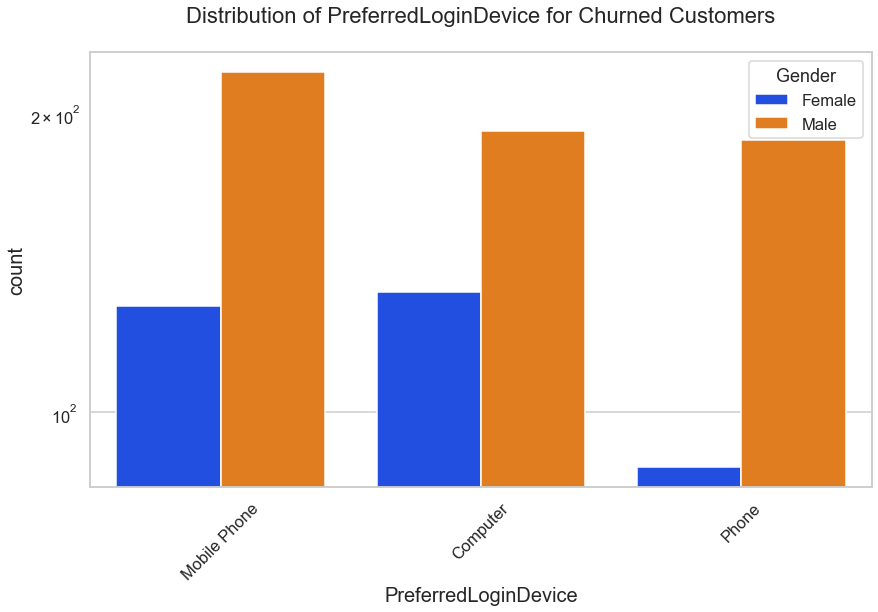

In [27]:
uniplot(new_df1_target1,col='PreferredLoginDevice',title='Distribution of PreferredLoginDevice for Churned Customers',hue='Gender')

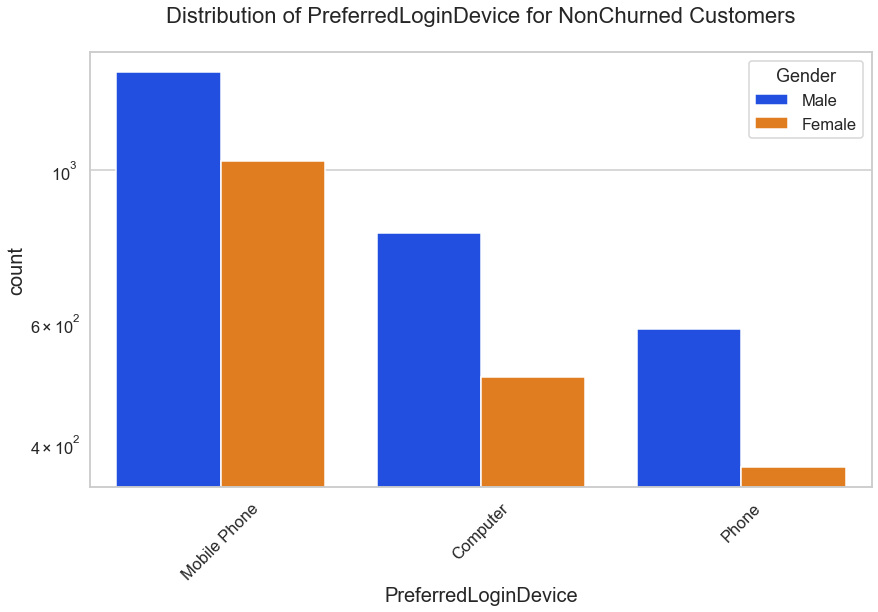

In [28]:
uniplot(new_df1_target0,col='PreferredLoginDevice',title='Distribution of PreferredLoginDevice for NonChurned Customers',hue='Gender')

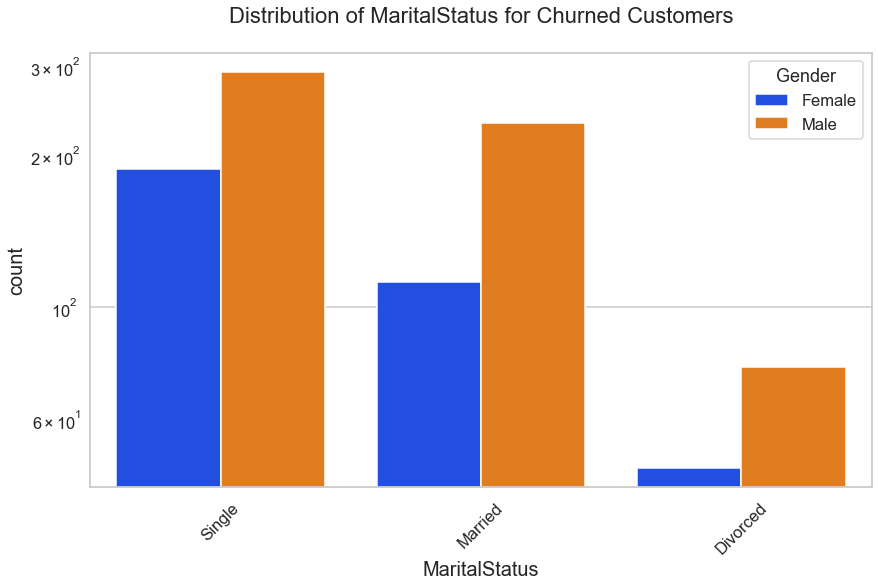

In [29]:
uniplot(new_df1_target1,col='MaritalStatus',title='Distribution of MaritalStatus for Churned Customers',hue='Gender')

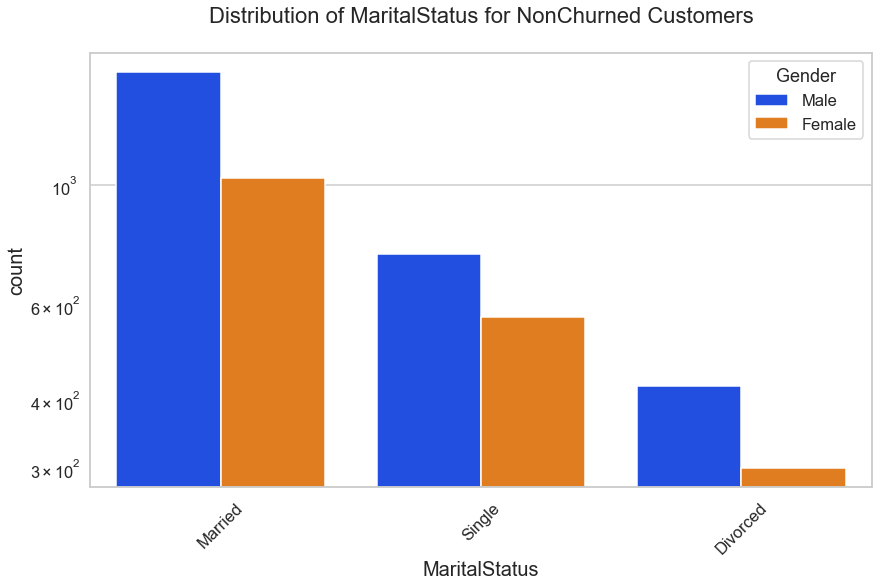

In [30]:
uniplot(new_df1_target0,col='MaritalStatus',title='Distribution of MaritalStatus for NonChurned Customers',hue='Gender')

In [31]:
df.isnull().sum()

Churn                                    0
Tenure                                   0
CityTier                                 0
WarehouseToHome                          0
HourSpendOnApp                           0
NumberOfDeviceRegistered                 0
SatisfactionScore                        0
Complain                                 0
OrderAmountHikeFromlastYear              0
CouponUsed                               0
OrderCount                               0
DaySinceLastOrder                        0
CashbackAmount                           0
PreferredLoginDevice_Computer            0
PreferredLoginDevice_Mobile Phone        0
PreferredLoginDevice_Phone               0
PreferredPaymentMode_CC                  0
PreferredPaymentMode_COD                 0
PreferredPaymentMode_Cash on Delivery    0
PreferredPaymentMode_Credit Card         0
PreferredPaymentMode_Debit Card          0
PreferredPaymentMode_E wallet            0
PreferredPaymentMode_UPI                 0
Gender_Fema

In [32]:
y=df['Churn']
y

0       1
1       1
2       1
3       1
4       1
       ..
5625    0
5626    0
5627    0
5628    0
5629    0
Name: Churn, Length: 5630, dtype: int64

In [33]:
x=df.drop('Churn',axis=1)
x

,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,...,Gender_Male,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,4.0,3,6.0,3.0,3,2,1,11.0,1.0,1.0,...,0,0,0,1,0,0,0,0,0,1
1,9.0,1,8.0,3.0,4,3,1,15.0,0.0,1.0,...,1,0,0,0,1,0,0,0,0,1
2,9.0,1,30.0,2.0,4,3,1,14.0,0.0,1.0,...,1,0,0,0,1,0,0,0,0,1
3,0.0,3,15.0,2.0,4,5,0,23.0,0.0,1.0,...,1,0,0,1,0,0,0,0,0,1
4,0.0,1,12.0,3.0,3,5,0,11.0,1.0,1.0,...,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,10.0,1,30.0,3.0,2,1,0,18.0,1.0,2.0,...,1,0,0,1,0,0,0,0,1,0
5626,13.0,1,13.0,3.0,5,5,0,16.0,1.0,2.0,...,1,1,0,0,0,0,0,0,1,0
5627,1.0,1,11.0,3.0,2,4,1,21.0,1.0,2.0,...,1,0,0,1,0,0,0,0,1,0
5628,23.0,3,9.0,4.0,5,4,0,15.0,2.0,2.0,...,1,0,0,1,0,0,0,0,1,0


# Decision Tree classifier

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize Decision Tree classifier
model = DecisionTreeClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")


Accuracy: 0.9591474245115453
Confusion Matrix:
[[917  24]
 [ 22 163]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       941
           1       0.87      0.88      0.88       185

    accuracy                           0.96      1126
   macro avg       0.92      0.93      0.93      1126
weighted avg       0.96      0.96      0.96      1126



# Random Forest`

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize Random Forest classifier
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")


Accuracy: 0.9698046181172292
Confusion Matrix:
[[941   0]
 [ 34 151]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       941
           1       1.00      0.82      0.90       185

    accuracy                           0.97      1126
   macro avg       0.98      0.91      0.94      1126
weighted avg       0.97      0.97      0.97      1126



# Support Vector Machines

In [36]:

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Standardize the data (scaling is often important for SVMs)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize SVM classifier with a linear kernel
model = SVC(kernel='linear', random_state=42)

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")


Accuracy: 0.8907637655417406
Confusion Matrix:
[[925  16]
 [107  78]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       941
           1       0.83      0.42      0.56       185

    accuracy                           0.89      1126
   macro avg       0.86      0.70      0.75      1126
weighted avg       0.89      0.89      0.88      1126



   # Graphic User Interface of Random Forest

In [39]:
import pickle
filename = 'model.sav'

In [41]:
pickle.dump(model, open(filename, 'wb'))

In [ ]:
import tkinter as tk
from tkinter import ttk
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

class ChurnPredictionApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Customer Churn Prediction")

        self.create_widgets()

    def create_widgets(self):
        # Create labels and entry widgets for each feature
        self.features = ['Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp',
                         'NumberOfDeviceRegistered', 'SatisfactionScore', 'Complain',
                         'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
                         'DaySinceLastOrder', 'CashbackAmount', 'PreferredLoginDevice_Computer',
                         'PreferredLoginDevice_Mobile Phone', 'PreferredLoginDevice_Phone',
                         'PreferredPaymentMode_CC', 'PreferredPaymentMode_COD',
                         'PreferredPaymentMode_Cash on Delivery', 'PreferredPaymentMode_Credit Card',
                         'PreferredPaymentMode_Debit Card', 'PreferredPaymentMode_E wallet',
                         'PreferredPaymentMode_UPI', 'Gender_Female', 'Gender_Male',
                         'PreferedOrderCat_Fashion', 'PreferedOrderCat_Grocery',
                         'PreferedOrderCat_Laptop & Accessory', 'PreferedOrderCat_Mobile',
                         'PreferedOrderCat_Mobile Phone', 'PreferedOrderCat_Others',
                         'MaritalStatus_Divorced', 'MaritalStatus_Married', 'MaritalStatus_Single']

        self.feature_entries = {}
        for i, feature in enumerate(self.features):
            ttk.Label(self.root, text=feature).grid(row=i, column=0, padx=5, pady=5)
            entry = ttk.Entry(self.root)
            entry.grid(row=i, column=1, padx=5, pady=5)
            self.feature_entries[feature] = entry

        # Create a button to predict churn
        ttk.Button(self.root, text="Predict Churn", command=self.predict_churn).grid(row=len(self.features), column=0, columnspan=2, pady=10)

        # Create a label to display the prediction result
        self.result_label = ttk.Label(self.root, text="")
        self.result_label.grid(row=len(self.features) + 1, column=0, columnspan=2, pady=10)

    def predict_churn(self):
        # Load the trained Random Forest model
        model = self.load_model()

        # Collect input data
        input_data = [float(self.feature_entries[feature].get()) for feature in self.features]

        # Make prediction
        prediction = model.predict([input_data])[0]

        # Display the prediction result
        if prediction == 1:
            result_text = "Churn: Yes"
        else:
            result_text = "Churn: No"

        self.result_label.config(text=result_text)

    def load_model(self):
        # Load your pre-trained Random Forest model
        # Replace this with the actual path to your model file
        model_path = r"C:\Users\Admin\Desktop\customer_churn\Customer_Churn_Prediction\model.sav"

        # Load the model using joblib or pickle
        model = joblib.load(model_path)

        return model

if __name__ == "__main__":
    root = tk.Tk()
    app = ChurnPredictionApp(root)
    root.mainloop()
